In [7]:
# %%
from pathlib import Path

import pandas as pd
import proplot as pplt
from pymol import cmd

from pyhdx.config import cfg
from pyhdx.fileIO import csv_to_dataframe
from pyhdx.plot import (
    CMAP_NORM_DEFAULTS,
    ddG_scatter_figure,
    dG_scatter_figure,
    linear_bars_figure,
    rainbowclouds_figure,
)
from pyhdx.support import apply_cmap, color_pymol


In [8]:
# %%
root_dir = Path.cwd().parent
web_data_dir = root_dir / "tests" / "test_data" / "output" / "web"



In [9]:
# %%
dG_df = csv_to_dataframe(web_data_dir / "dG.csv")
dG_df
plot_data = dG_df.xs("Gibbs_fit_1", axis=1, level=0)


In [10]:
# %%

width = cfg.plotting.page_width
aspect = cfg.plotting.dG_aspect
figure_kwargs = {
    "width": width,
    "refaspect": aspect,
}

figure_kwargs["ncols"] = 2


In [11]:
# %%
protein_states = plot_data.columns.get_level_values(0).unique()
protein_states


Index(['SecB_tetramer', 'SecB_dimer'], dtype='object', name='state')

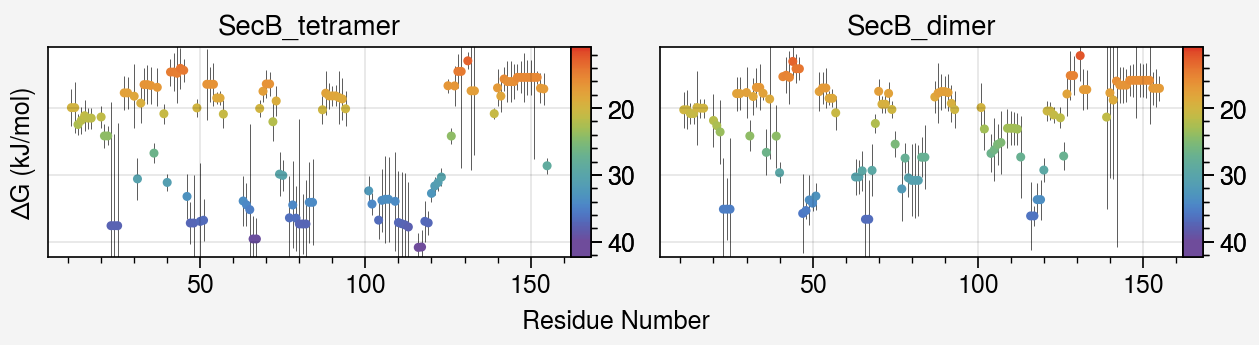

In [12]:
# %%

fig, axes, cbars = dG_scatter_figure(plot_data)  # , **figure_kwargs)
pplt.show()


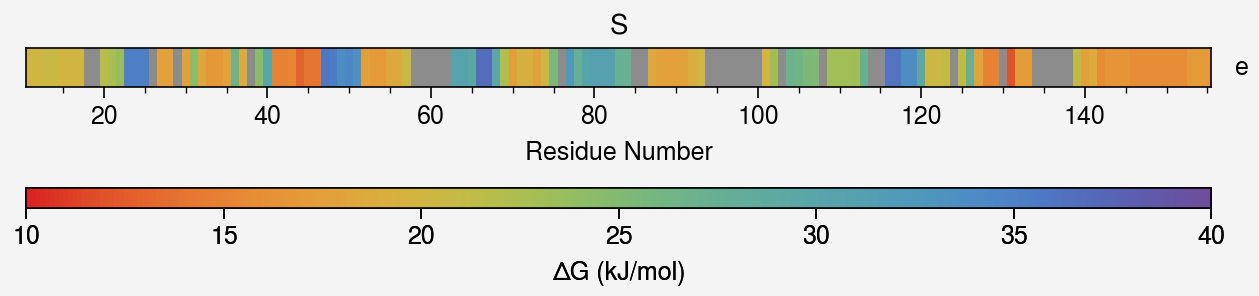

In [13]:
# %%

linear_bars_figure(plot_data)
pplt.show()


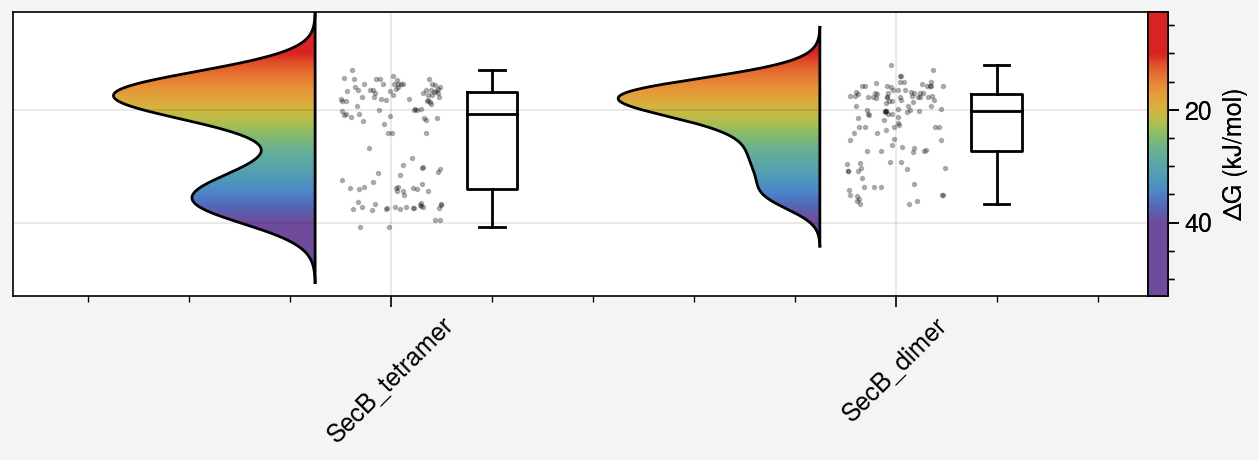

In [14]:
# %%

rainbowclouds_figure(plot_data)
pplt.show()


(Figure(nrows=1, ncols=1, refaspect=2.5, figwidth=6.3),
 SubplotGrid(nrows=1, ncols=1, length=1),
 [<matplotlib.colorbar.Colorbar at 0x218917c8c70>])

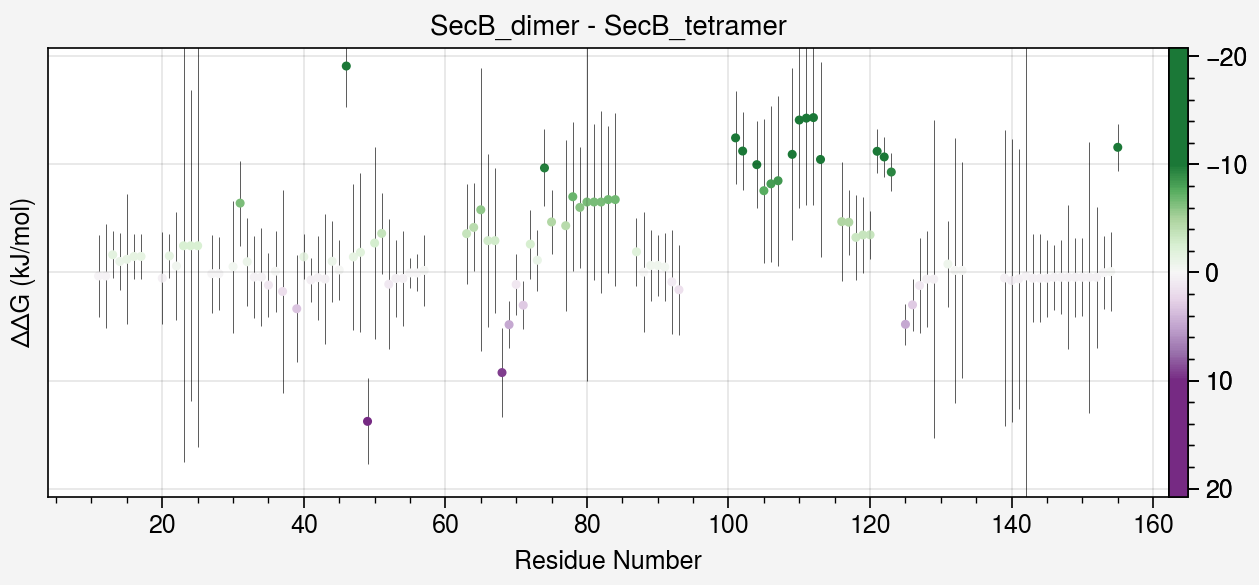

In [15]:
# %%
protein_states = plot_data.columns.get_level_values(0).unique()
ddG_scatter_figure(plot_data, reference=protein_states[0])


In [17]:
# %%
# Creating a colored structure
cmd.load("https://files.rcsb.org/download/1QYN.pdb")
cmd.set("antialias", 2)
cmd.set("fog", 0)


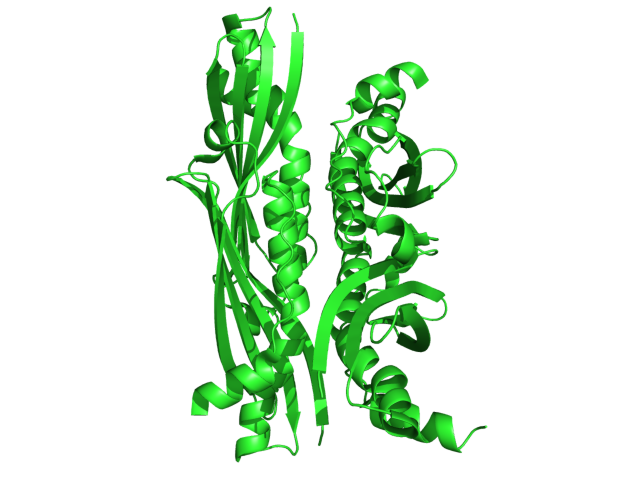

In [18]:
# %%
cmd.remove("resn HOH")  # This removes only water molecules
cmd.ipython_image()

In [19]:
# %%
# take dG values for SecB tetramer and reindex (pad with nan)
# such that these regions are correctly colored as no coverage
dG_values = plot_data[("SecB_tetramer", "dG")].reindex(pd.RangeIndex(1, 160))


In [20]:
# %%
# create a pandas Series with hexadeicmal codes
cmap, norm = CMAP_NORM_DEFAULTS["dG"]
colors = apply_cmap(dG_values, cmap, norm)
colors


1      #8C8C8C
2      #8C8C8C
3      #8C8C8C
4      #8C8C8C
5      #8C8C8C
        ...   
155    #5FAA9E
156    #8C8C8C
157    #8C8C8C
158    #8C8C8C
159    #8C8C8C
Length: 159, dtype: object

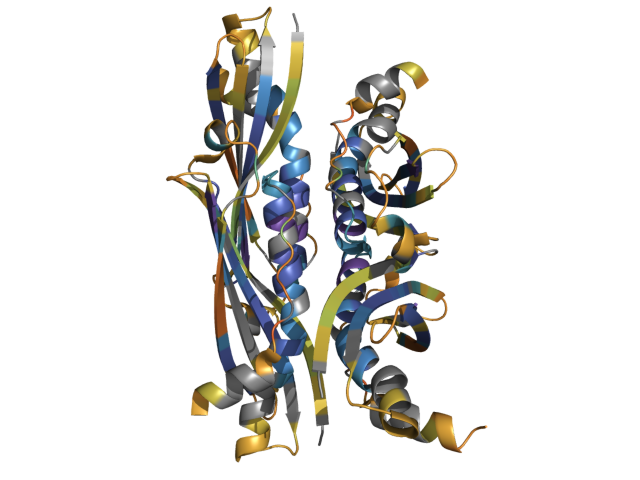

In [21]:
# %%
# apply the colors to the pymol structure
color_pymol(colors, cmd)
cmd.ipython_image()


In [22]:
# %%

# save the output
cmd.png(
    "SecB_dG_render.png",
    width="10cm",
    dpi=300,
    ray=1,
)



1

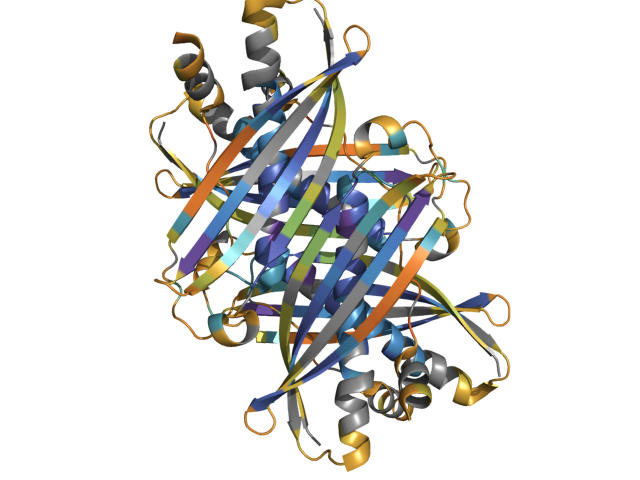

In [23]:
# %%
# rotate for a different view
cmd.rotate("y", 90)
cmd.ipython_image()
